# Testing all features of pyKasso new version #

In [3]:
#Set path variable to load local version of pykasso
import sys
sys.path.append('C:/Users/Chloe/Documents/GitHub/pyKasso/pykasso') #path to local version of package
import base as pk  #in this case, "base" is the name of the .py file with all of the pykasso functions in it

#Check that it worked:
#catchment = pk.SKS() #uncomment this line to create a simple model
#You should see a printed statement indicating that you are using a development version of the package.
#If you do not see this statement, you are using the main version, and changes you make to the local version will have no effect.

In [4]:
#Import the rest of the modules needed:
import os            
import sys           
import importlib
import copy
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import karstnet as kn

#all fast-marching-related imports
import agd
from agd import Eikonal
from agd.Metrics import Riemann

#Local modules:
import importlib.util
spec = importlib.util.spec_from_file_location('swmmpy', 'C:/Users/Chloe/Documents/GitHub/gottesacker/swmmpy.py')
sp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sp)

os.getcwd()

'C:\\Users\\Chloe\\Documents\\GitHub\\pyKasso\\notebooks'

CAUTION: You are using the development version of this package.
- initialize_costMap() - Warning : no geology n 0 found.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


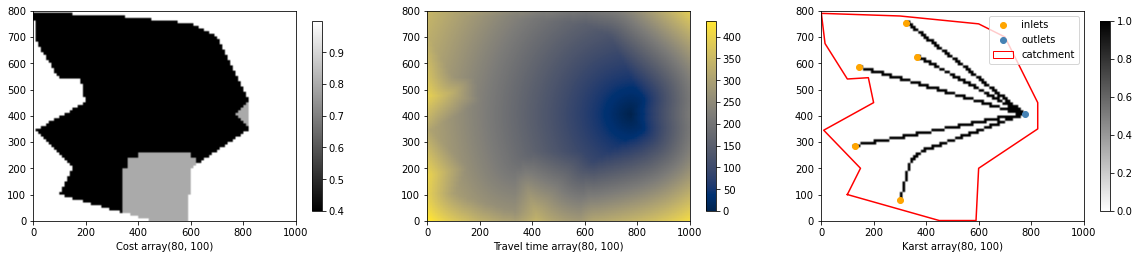

- initialize_costMap() - Warning : no geology n 0 found.

 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


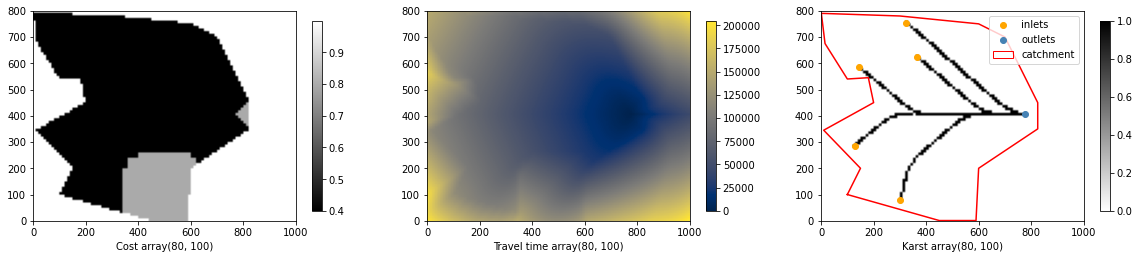

In [43]:
importlib.reload(pk)

#Load model:
catchment = pk.SKS('inputs/valley1/settings.yaml') 

#Modify model settings (uncomment to activate):

#Catchment boundaries:
catchment.set_data_has_polygon(True)                            #set the catchment boundaries by importing a polygon file
catchment.update_polygon()                                      #update

#Outlets:
#catchment.set_outlets_data('inputs/valley1/outlets2D.txt')      #load a new outlet file with two outlets instead of one
#catchment.set_outlets_mode('random')                             #set the outlet mode to generate n random points
#catchment.set_outlets_mode('composite')                          #set the outet mode to generate n random points in addition to points imported from text file
#catchment.set_outlets_number(1)                                  #set the number of outlets to be generated
#catchment.set_outlets_importance([1,1])                          #assign each outlet to its own iteration (length of list = number of outlets)
#catchment.set_inlets_per_outlet([1,1])                           #assign an equal number of inlets to each outlet (length of list = number of outlets)
#catchment.update_outlets()                                       #update

#Inlets:
#catchment.set_inlets_mode('random')                             #set the inlet mode to generate n random points
#catchment.set_inlets_mode('composite')                         #set the inlet mode to generate n random points in addition to imported points
#catchment.set_inlets_number(2)                                  #set the number of inlets to be generated
#catchment.update_inlets()                                       #update

#Geology:
#catchment.set_geological_mode('null')                           #no geology
#catchment.set_geological_mode('gslib')                          #import from gslib
#catchment.set_geological_datafile('inputs/valley1/geo80x100.gslib') #set path to gslib file
#catchment.update_geology() 

#Topography:

#catchment.set_fractures_mode('random')                          #randomly generate a discrete fracture network
#catchment.update_fractures()                                    #when altering the model's geologic setting, update after making changes
#catchment.set_inlets_importance([1,2,2])                        #assign the first inlet to the first iteration, the next two to the second iteration, and the next two to the last iteration
#catchment.set_inlets_importance([1])                            #assign all inlets for each outlet to a single iteration
catchment.set_orientation_mode('surface')                        #use the lower surface of the karst unit as the anisotropy field
catchment.update_orientation()                                   #update

#Run isotropic conduit network simulation & display results:
catchment.compute_karst_network()
catchment.show()
#catchment.show_network(data=catchment.karst_simulations[0], simplify=False, labels=['inlets','outlets'], plot_nodes=False, legend=False, color='k')

#Run anisotropic conduit network simulation & display results:
catchment.set_algorithm('Riemann2')
catchment.compute_karst_network()
catchment.show()